In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Greek:

    def __init__(self) -> None:
        # ref:https://albertotb.com/Equivalence-between-distribution-functions-in-R-and-Python/
        pass

    def __d1(self,St,K,r,T,t,sig) -> np.ndarray:
        d1 = (np.log(St/K)+(r+1/2*sig**2)*(T-t))/(sig*np.sqrt(T-t))
        return d1
    
    def __d2(self,St,K,r,T,t,sig) -> np.ndarray:
        d2 = (np.log(St/K)+(r-1/2*sig**2)*(T-t))/(sig*np.sqrt(T-t))
        return d2

    def delta(self,St,K,r,T,t,sig) -> np.ndarray:
        Delta = norm.cdf(self.__d1(St,K,r,T,t,sig))
        return Delta
    
    def gamma(self,St,K,r,T,t,sig) -> np.ndarray:
        Gamma = norm.pdf(self.__d1(St,K,r,T,t,sig))/(sig*St*np.sqrt(T-t))
        return Gamma
    
    def vega(self,St,K,r,T,t,sig) -> np.ndarray:
        Vega = St*np.sqrt(T-t)*norm.pdf(self.__d1(St,K,r,T,t,sig))
        return Vega
    
    def theta(self,St,K,r,T,t,sig) -> np.ndarray:
        Theta = -(St*norm.pdf(self.__d1(St,K,r,T,t,sig))*sig)/(2*np.sqrt(T-t)) -\
            r*K*np.exp(-r*(T-t))*norm.cdf(self.__d2(St,K,r,T,t,sig))
        return Theta

    def rho(self,St,K,r,T,t,sig) -> np.ndarray:
        Rho = (T-t)*K*np.exp(-r*(T-t))*norm.cdf(self.__d2(St,K,r,T,t,sig))
        return Rho
    
    def price(self,St,K,r,T,t,sig) -> np.ndarray:
        Price = St*norm.cdf(self.__d1(St,K,r,T,t,sig))-\
            K*np.exp(-r*(T-t))*norm.cdf(self.__d2(St,K,r,T,t,sig))
        return Price

In [12]:
class dataD:

    def __init__(self) -> None:
        self.D = {}
        self.Dtemplate = {}
        self.init()
    
    def init(self) -> None:
        self.D = {
            "St":100,
            "K":100,
            "r":0.03,
            "T":1,
            "t":0,
            "sig":0.02
        }
        self.Dtemplate = {
            "St":100,
            "K":100,
            "r":0.03,
            "T":1,
            "t":0,
            "sig":0.02
        }

    def update(self,key,value) -> None:
        self.D[key] = value

    def initKey(self,key) -> None:
        self.D[key] = self.Dtemplate[key]

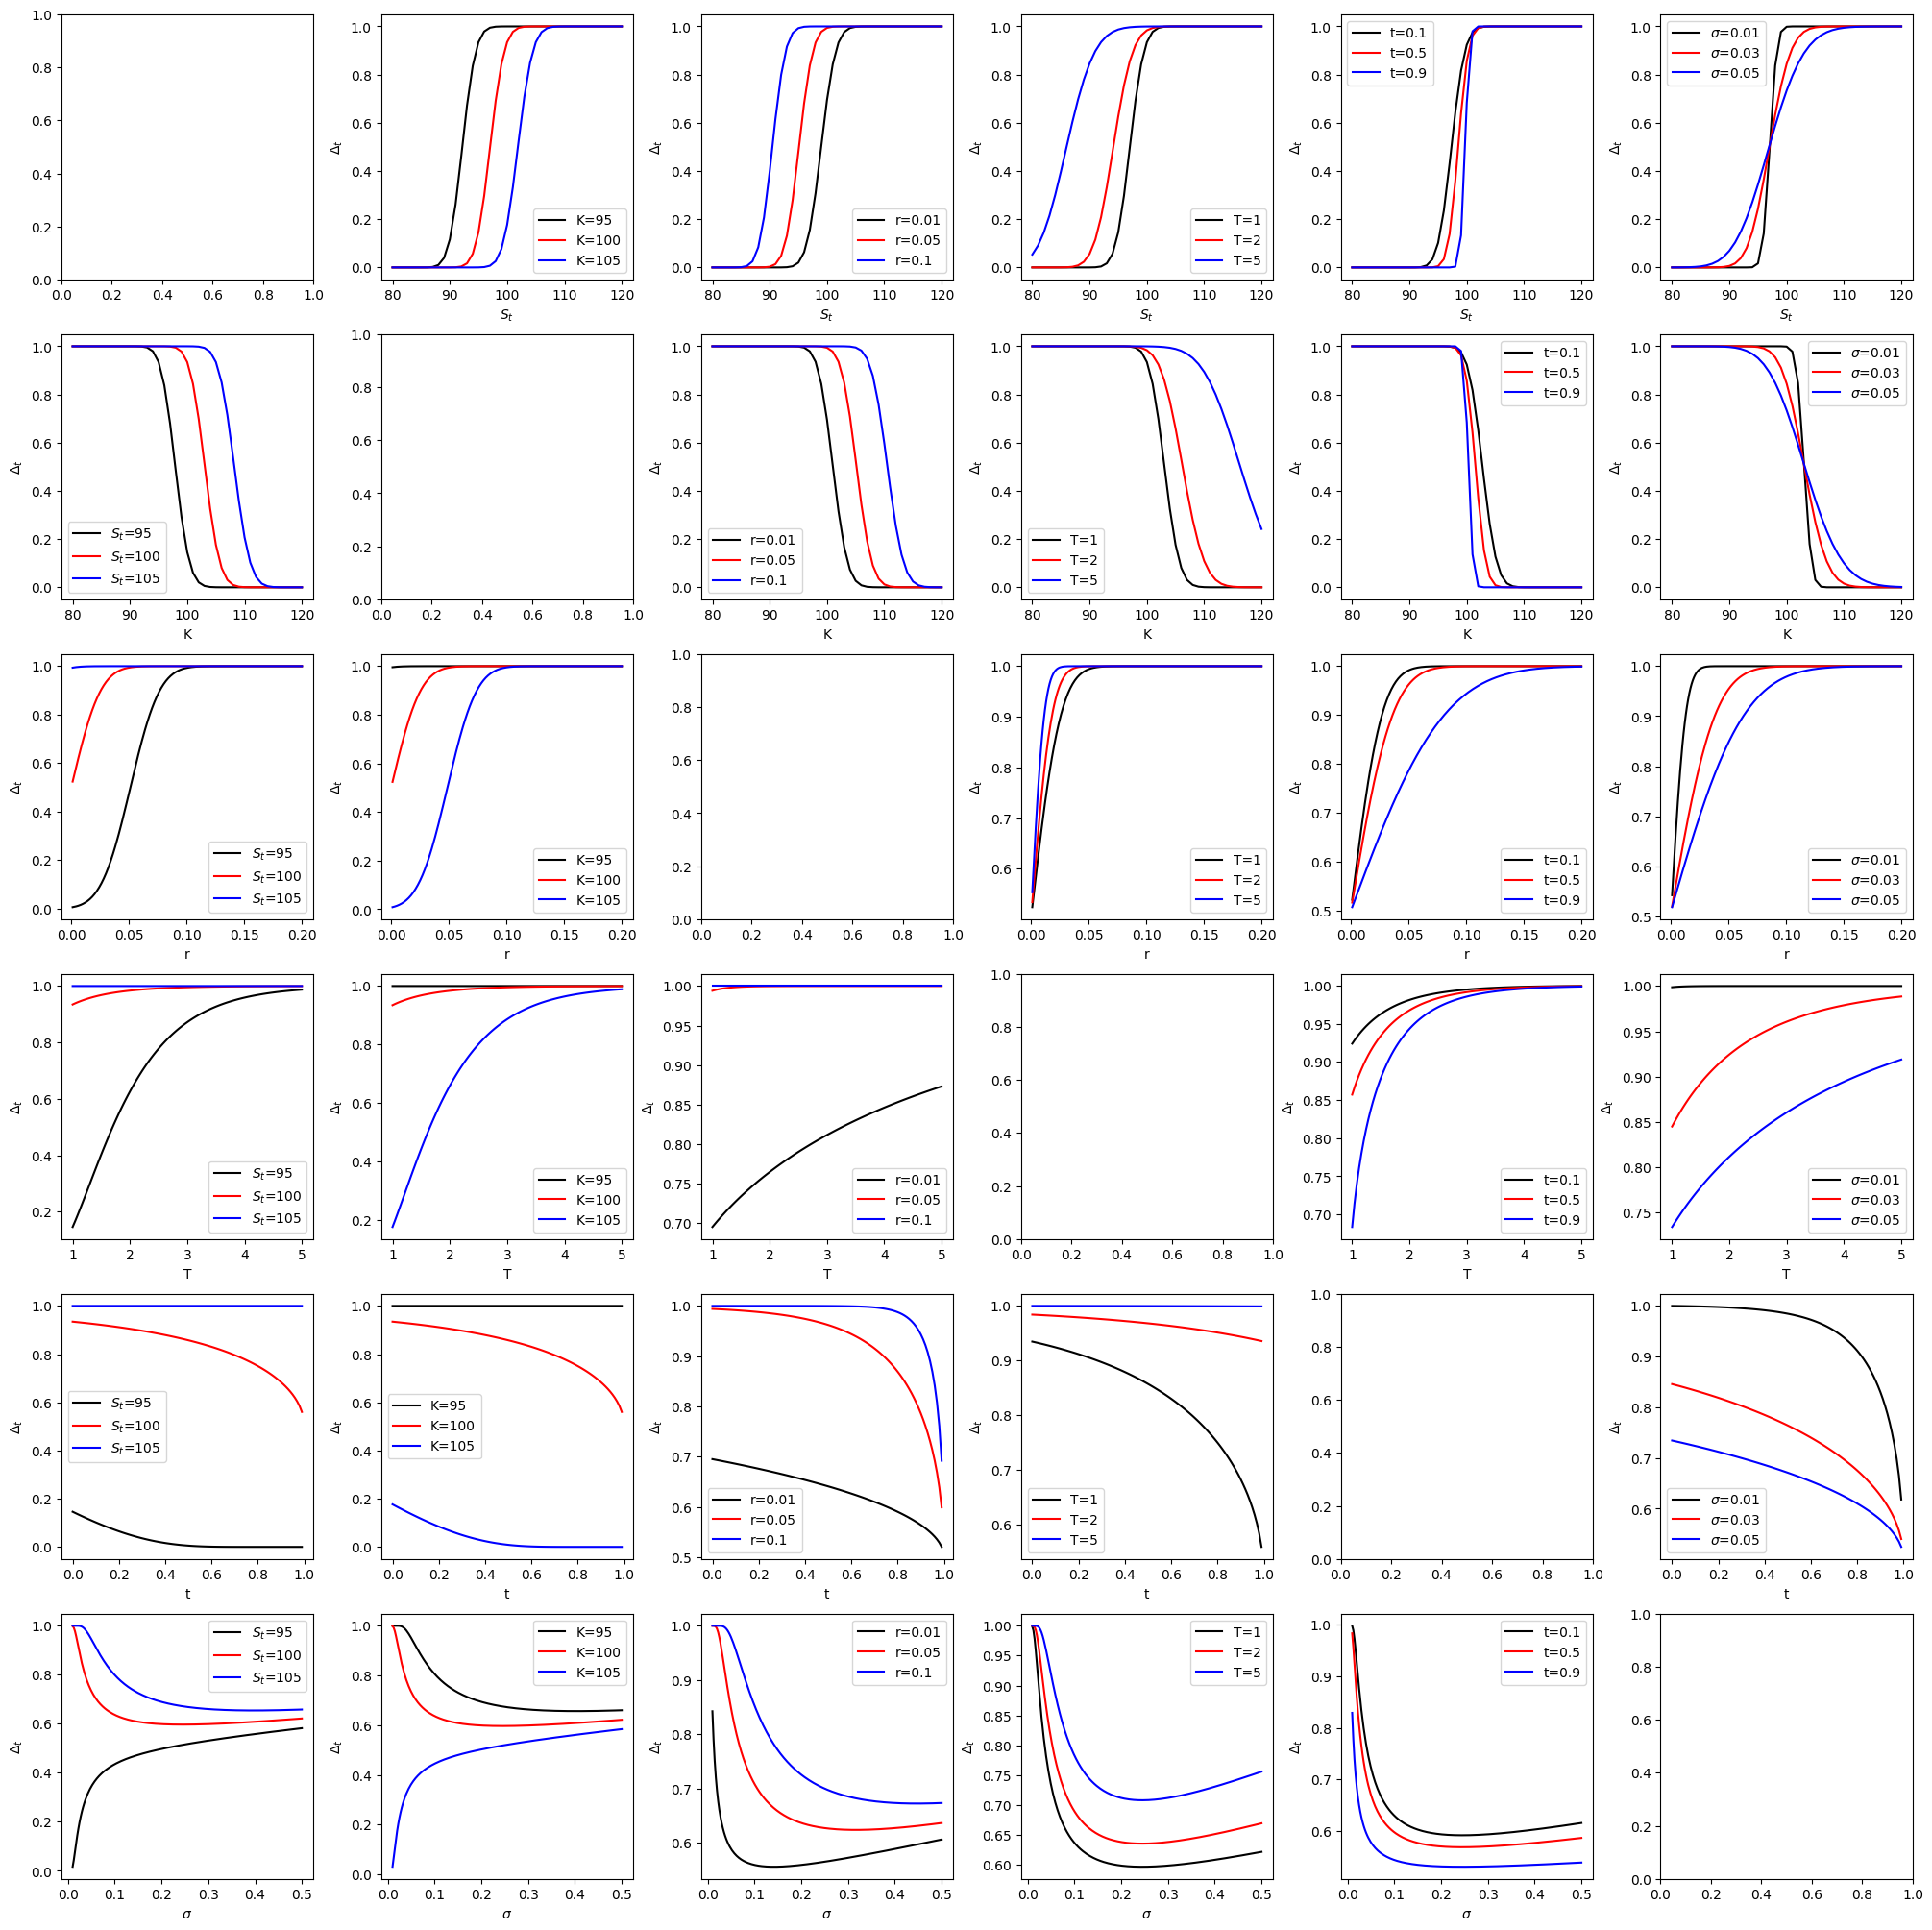

In [23]:
fig, ax = plt.subplots(6,6,figsize=(20,20))
fig.tight_layout(h_pad=2, w_pad=2)
greek = Greek()

def autoplot(ax,row,seqKey,dataDic:dataD):
    # set up parameters
    StL = [95,100,105]
    KL = [95,100,105]
    rL = [0.01,0.05,0.1]
    TL = [1,2,5]
    tL = [0.1,0.5,0.9]
    sigL = [0.01,0.03,0.05]

    colorL = ["black","red","blue"]
    xlabelL = {"St":"$S_t$","K":"K","r":"r","T":"T","t":"t","sig":"$\sigma$"}
    
    # loop levels
    for col in range(6):
        if col == row:
            continue
        if col == 0:
            for dataInd in range(3):
                dataDic.update("St",StL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.delta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Delta_t$")
            ax[row,col].legend([f"$S_t$={StL[0]}",f"$S_t$={StL[1]}",f"$S_t$={StL[2]}"])
            dataDic.initKey("St")
        elif col == 1:
            for dataInd in range(3):
                dataDic.update("K", KL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.delta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Delta_t$")
            ax[row,col].legend([f"K={KL[0]}",f"K={KL[1]}",f"K={KL[2]}"])
            dataDic.initKey("K")
        elif col == 2:
            for dataInd in range(3):
                dataDic.update("r", rL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.delta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Delta_t$")
            ax[row,col].legend([f"r={rL[0]}",f"r={rL[1]}",f"r={rL[2]}"])
            dataDic.initKey("r")
        elif col == 3:
            for dataInd in range(3):
                dataDic.update("T", TL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.delta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Delta_t$")
            ax[row,col].legend([f"T={TL[0]}",f"T={TL[1]}",f"T={TL[2]}"])
            dataDic.initKey("T")
        elif col == 4:
            for dataInd in range(3):
                dataDic.update("t", tL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.delta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Delta_t$")
            ax[row,col].legend([f"t={tL[0]}",f"t={tL[1]}",f"t={tL[2]}"])
            dataDic.initKey("t")
        elif col == 5:
            for dataInd in range(3):
                dataDic.update("sig", sigL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.delta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Delta_t$")
            ax[row,col].legend([f"$\sigma$={sigL[0]}",f"$\sigma$={sigL[1]}",f"$\sigma$={sigL[2]}"])
            dataDic.initKey("sig")
    
    dataDic.init()

# generate plots
data = dataD()
data.update("St",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,0,"St",data)
data.update("K",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,1,"K",data)
data.update("r",np.linspace(start=0.001,stop=0.2,num=200))
autoplot(ax,2,"r",data)
data.update("T",np.linspace(start=1,stop=5,num=100))
autoplot(ax,3,"T",data)
data.update("t",np.linspace(start=0,stop=0.99,num=100))
autoplot(ax,4,"t",data)
data.update("sig",np.linspace(start=0.01,stop=0.5,num=200))
autoplot(ax,5,"sig",data)

In [ ]:
plt.close()

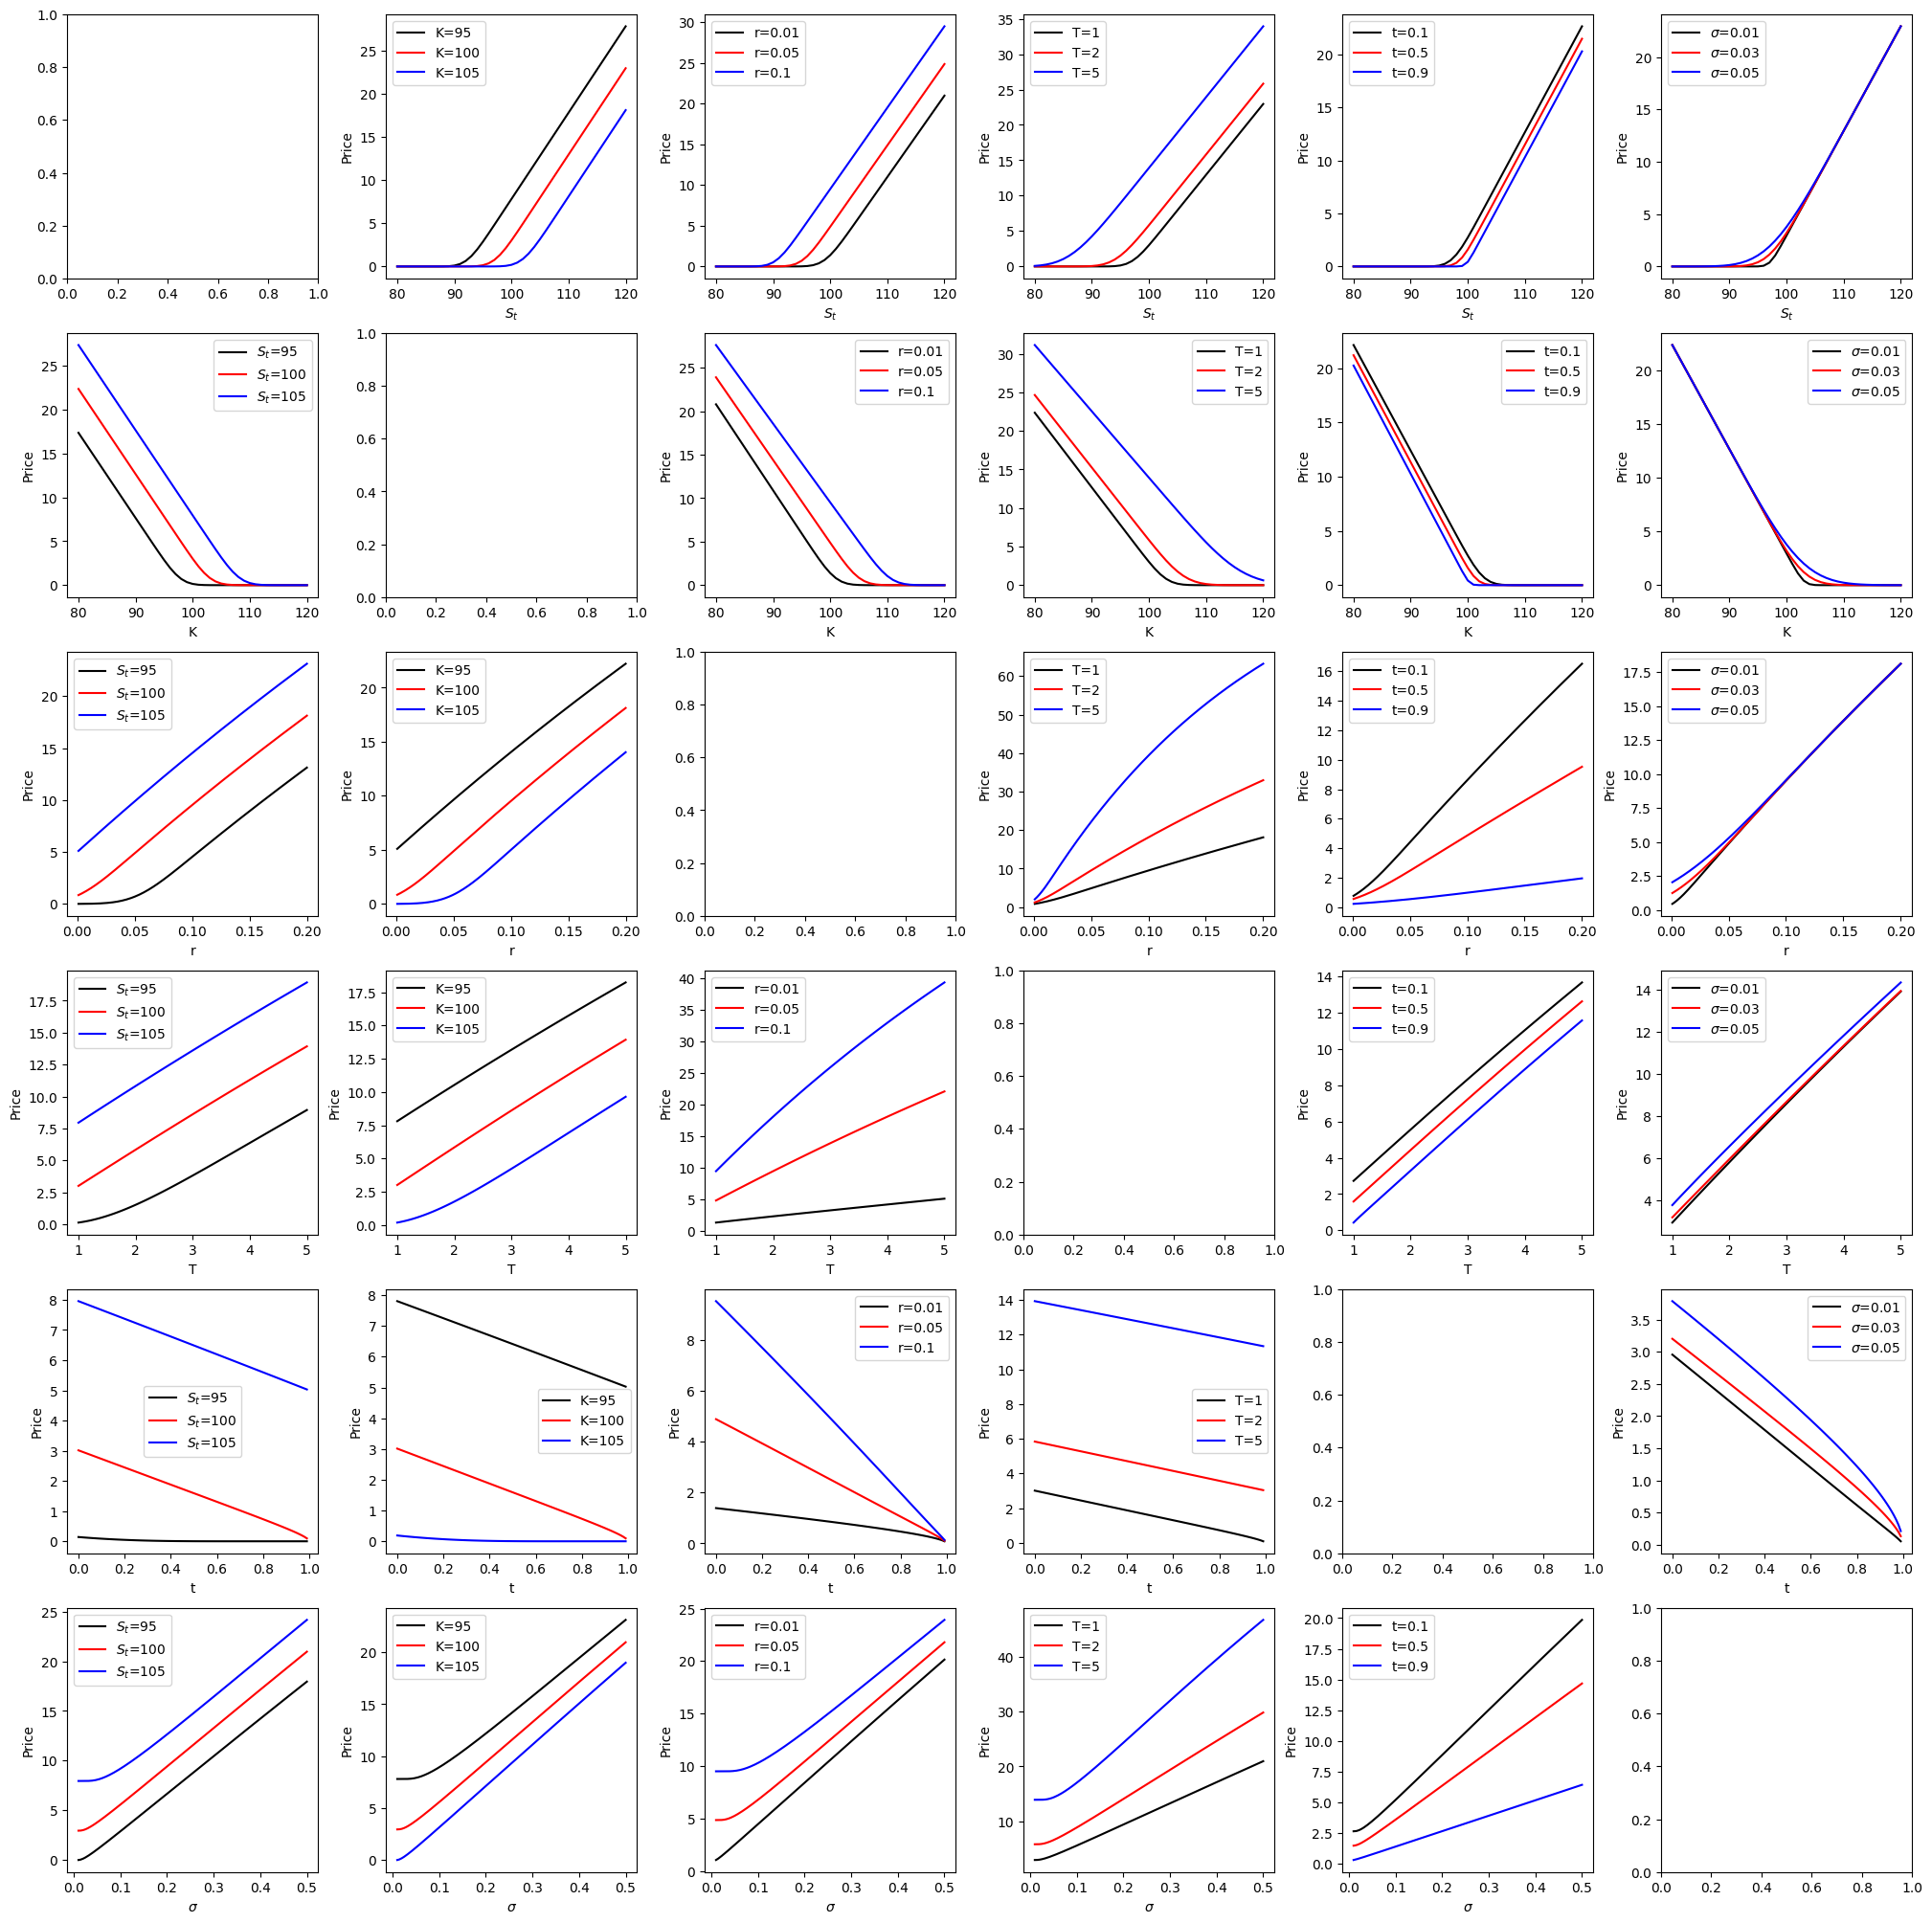

In [24]:
fig, ax = plt.subplots(6,6,figsize=(20,20))
fig.tight_layout(h_pad=2, w_pad=2)
greek = Greek()

def autoplot(ax,row,seqKey,dataDic:dataD):
    # set up parameters
    StL = [95,100,105]
    KL = [95,100,105]
    rL = [0.01,0.05,0.1]
    TL = [1,2,5]
    tL = [0.1,0.5,0.9]
    sigL = [0.01,0.03,0.05]

    colorL = ["black","red","blue"]
    xlabelL = {"St":"$S_t$","K":"K","r":"r","T":"T","t":"t","sig":"$\sigma$"}
    
    # loop levels
    for col in range(6):
        if col == row:
            continue
        if col == 0:
            for dataInd in range(3):
                dataDic.update("St",StL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.price(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="Price")
            ax[row,col].legend([f"$S_t$={StL[0]}",f"$S_t$={StL[1]}",f"$S_t$={StL[2]}"])
            dataDic.initKey("St")
        elif col == 1:
            for dataInd in range(3):
                dataDic.update("K", KL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.price(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="Price")
            ax[row,col].legend([f"K={KL[0]}",f"K={KL[1]}",f"K={KL[2]}"])
            dataDic.initKey("K")
        elif col == 2:
            for dataInd in range(3):
                dataDic.update("r", rL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.price(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="Price")
            ax[row,col].legend([f"r={rL[0]}",f"r={rL[1]}",f"r={rL[2]}"])
            dataDic.initKey("r")
        elif col == 3:
            for dataInd in range(3):
                dataDic.update("T", TL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.price(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="Price")
            ax[row,col].legend([f"T={TL[0]}",f"T={TL[1]}",f"T={TL[2]}"])
            dataDic.initKey("T")
        elif col == 4:
            for dataInd in range(3):
                dataDic.update("t", tL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.price(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="Price")
            ax[row,col].legend([f"t={tL[0]}",f"t={tL[1]}",f"t={tL[2]}"])
            dataDic.initKey("t")
        elif col == 5:
            for dataInd in range(3):
                dataDic.update("sig", sigL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.price(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="Price")
            ax[row,col].legend([f"$\sigma$={sigL[0]}",f"$\sigma$={sigL[1]}",f"$\sigma$={sigL[2]}"])
            dataDic.initKey("sig")
    
    dataDic.init()

# generate plots
data = dataD()
data.update("St",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,0,"St",data)
data.update("K",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,1,"K",data)
data.update("r",np.linspace(start=0.001,stop=0.2,num=200))
autoplot(ax,2,"r",data)
data.update("T",np.linspace(start=1,stop=5,num=100))
autoplot(ax,3,"T",data)
data.update("t",np.linspace(start=0,stop=0.99,num=100))
autoplot(ax,4,"t",data)
data.update("sig",np.linspace(start=0.01,stop=0.5,num=200))
autoplot(ax,5,"sig",data)

In [ ]:
plt.close()

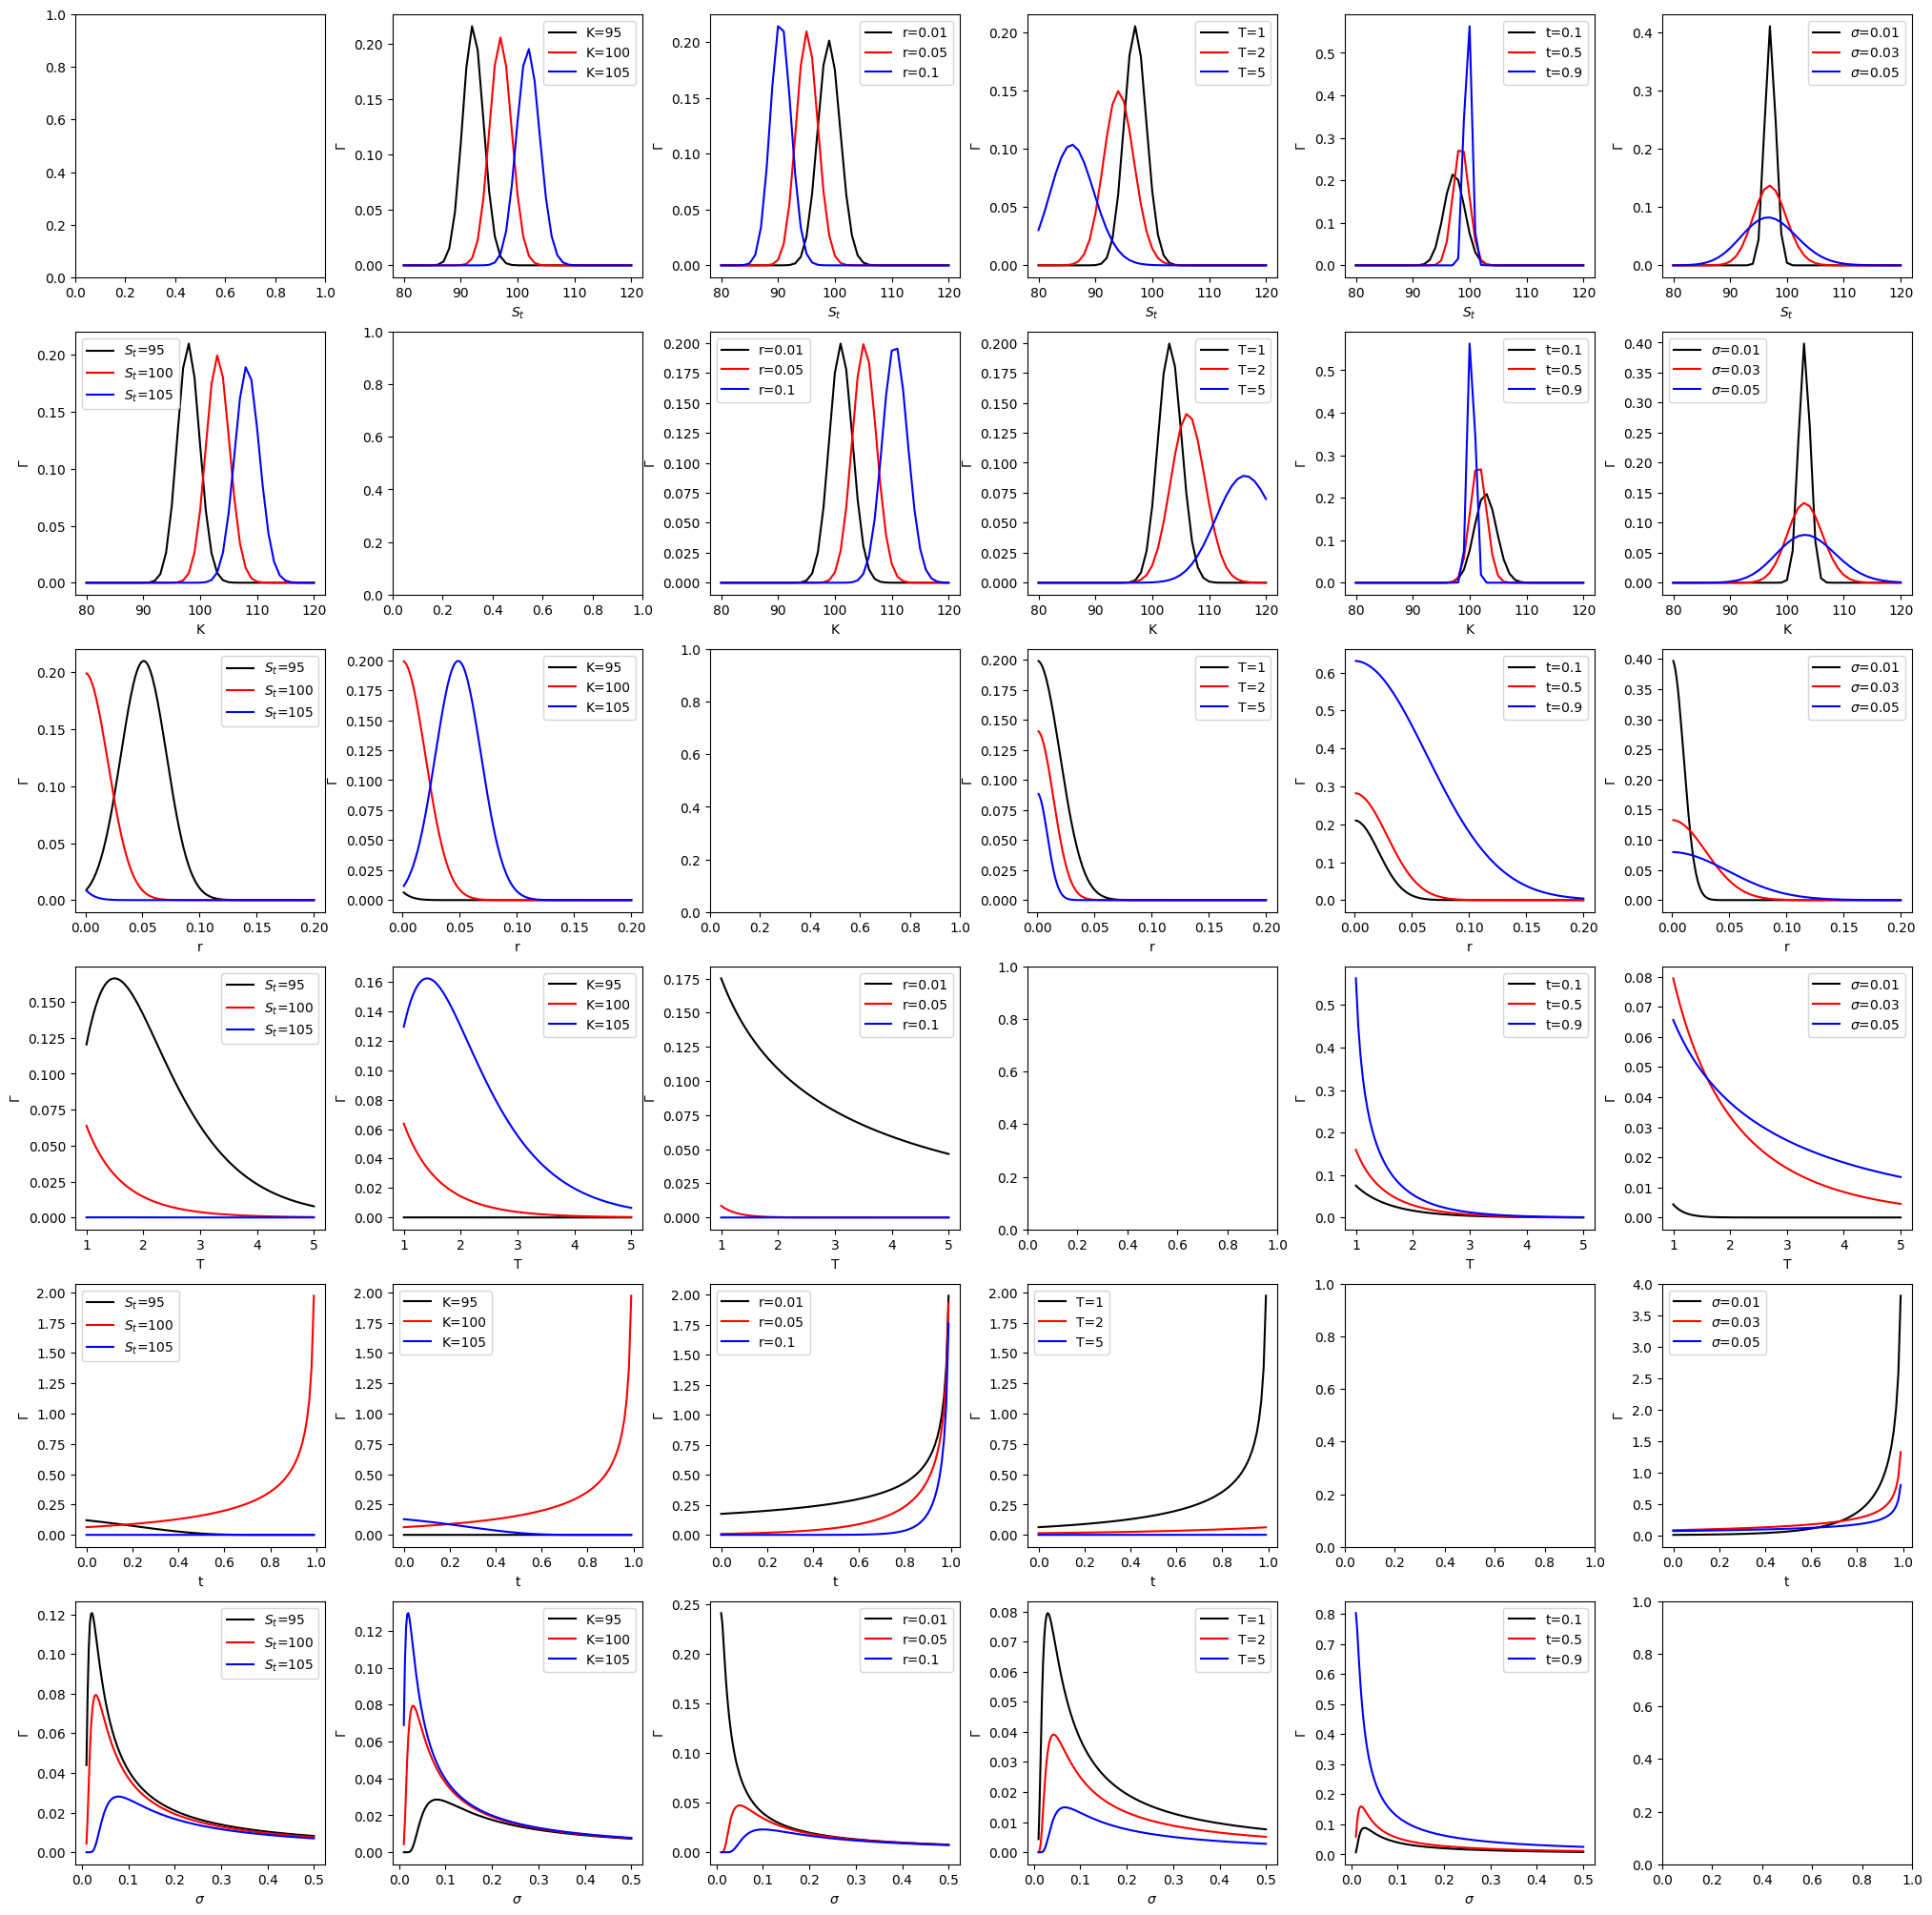

In [25]:
# Gamma
fig, ax = plt.subplots(6,6,figsize=(20,20))
fig.tight_layout(h_pad=2, w_pad=2)
greek = Greek()

def autoplot(ax,row,seqKey,dataDic:dataD):
    # set up parameters
    StL = [95,100,105]
    KL = [95,100,105]
    rL = [0.01,0.05,0.1]
    TL = [1,2,5]
    tL = [0.1,0.5,0.9]
    sigL = [0.01,0.03,0.05]

    colorL = ["black","red","blue"]
    xlabelL = {"St":"$S_t$","K":"K","r":"r","T":"T","t":"t","sig":"$\sigma$"}
    
    # loop levels
    for col in range(6):
        if col == row:
            continue
        if col == 0:
            for dataInd in range(3):
                dataDic.update("St",StL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.gamma(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Gamma$")
            ax[row,col].legend([f"$S_t$={StL[0]}",f"$S_t$={StL[1]}",f"$S_t$={StL[2]}"])
            dataDic.initKey("St")
        elif col == 1:
            for dataInd in range(3):
                dataDic.update("K", KL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.gamma(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Gamma$")
            ax[row,col].legend([f"K={KL[0]}",f"K={KL[1]}",f"K={KL[2]}"])
            dataDic.initKey("K")
        elif col == 2:
            for dataInd in range(3):
                dataDic.update("r", rL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.gamma(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Gamma$")
            ax[row,col].legend([f"r={rL[0]}",f"r={rL[1]}",f"r={rL[2]}"])
            dataDic.initKey("r")
        elif col == 3:
            for dataInd in range(3):
                dataDic.update("T", TL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.gamma(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Gamma$")
            ax[row,col].legend([f"T={TL[0]}",f"T={TL[1]}",f"T={TL[2]}"])
            dataDic.initKey("T")
        elif col == 4:
            for dataInd in range(3):
                dataDic.update("t", tL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.gamma(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Gamma$")
            ax[row,col].legend([f"t={tL[0]}",f"t={tL[1]}",f"t={tL[2]}"])
            dataDic.initKey("t")
        elif col == 5:
            for dataInd in range(3):
                dataDic.update("sig", sigL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.gamma(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Gamma$")
            ax[row,col].legend([f"$\sigma$={sigL[0]}",f"$\sigma$={sigL[1]}",f"$\sigma$={sigL[2]}"])
            dataDic.initKey("sig")
    
    dataDic.init()

# generate plots
data = dataD()
data.update("St",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,0,"St",data)
data.update("K",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,1,"K",data)
data.update("r",np.linspace(start=0.001,stop=0.2,num=200))
autoplot(ax,2,"r",data)
data.update("T",np.linspace(start=1,stop=5,num=100))
autoplot(ax,3,"T",data)
data.update("t",np.linspace(start=0,stop=0.99,num=100))
autoplot(ax,4,"t",data)
data.update("sig",np.linspace(start=0.01,stop=0.5,num=200))
autoplot(ax,5,"sig",data)

In [26]:
plt.close()

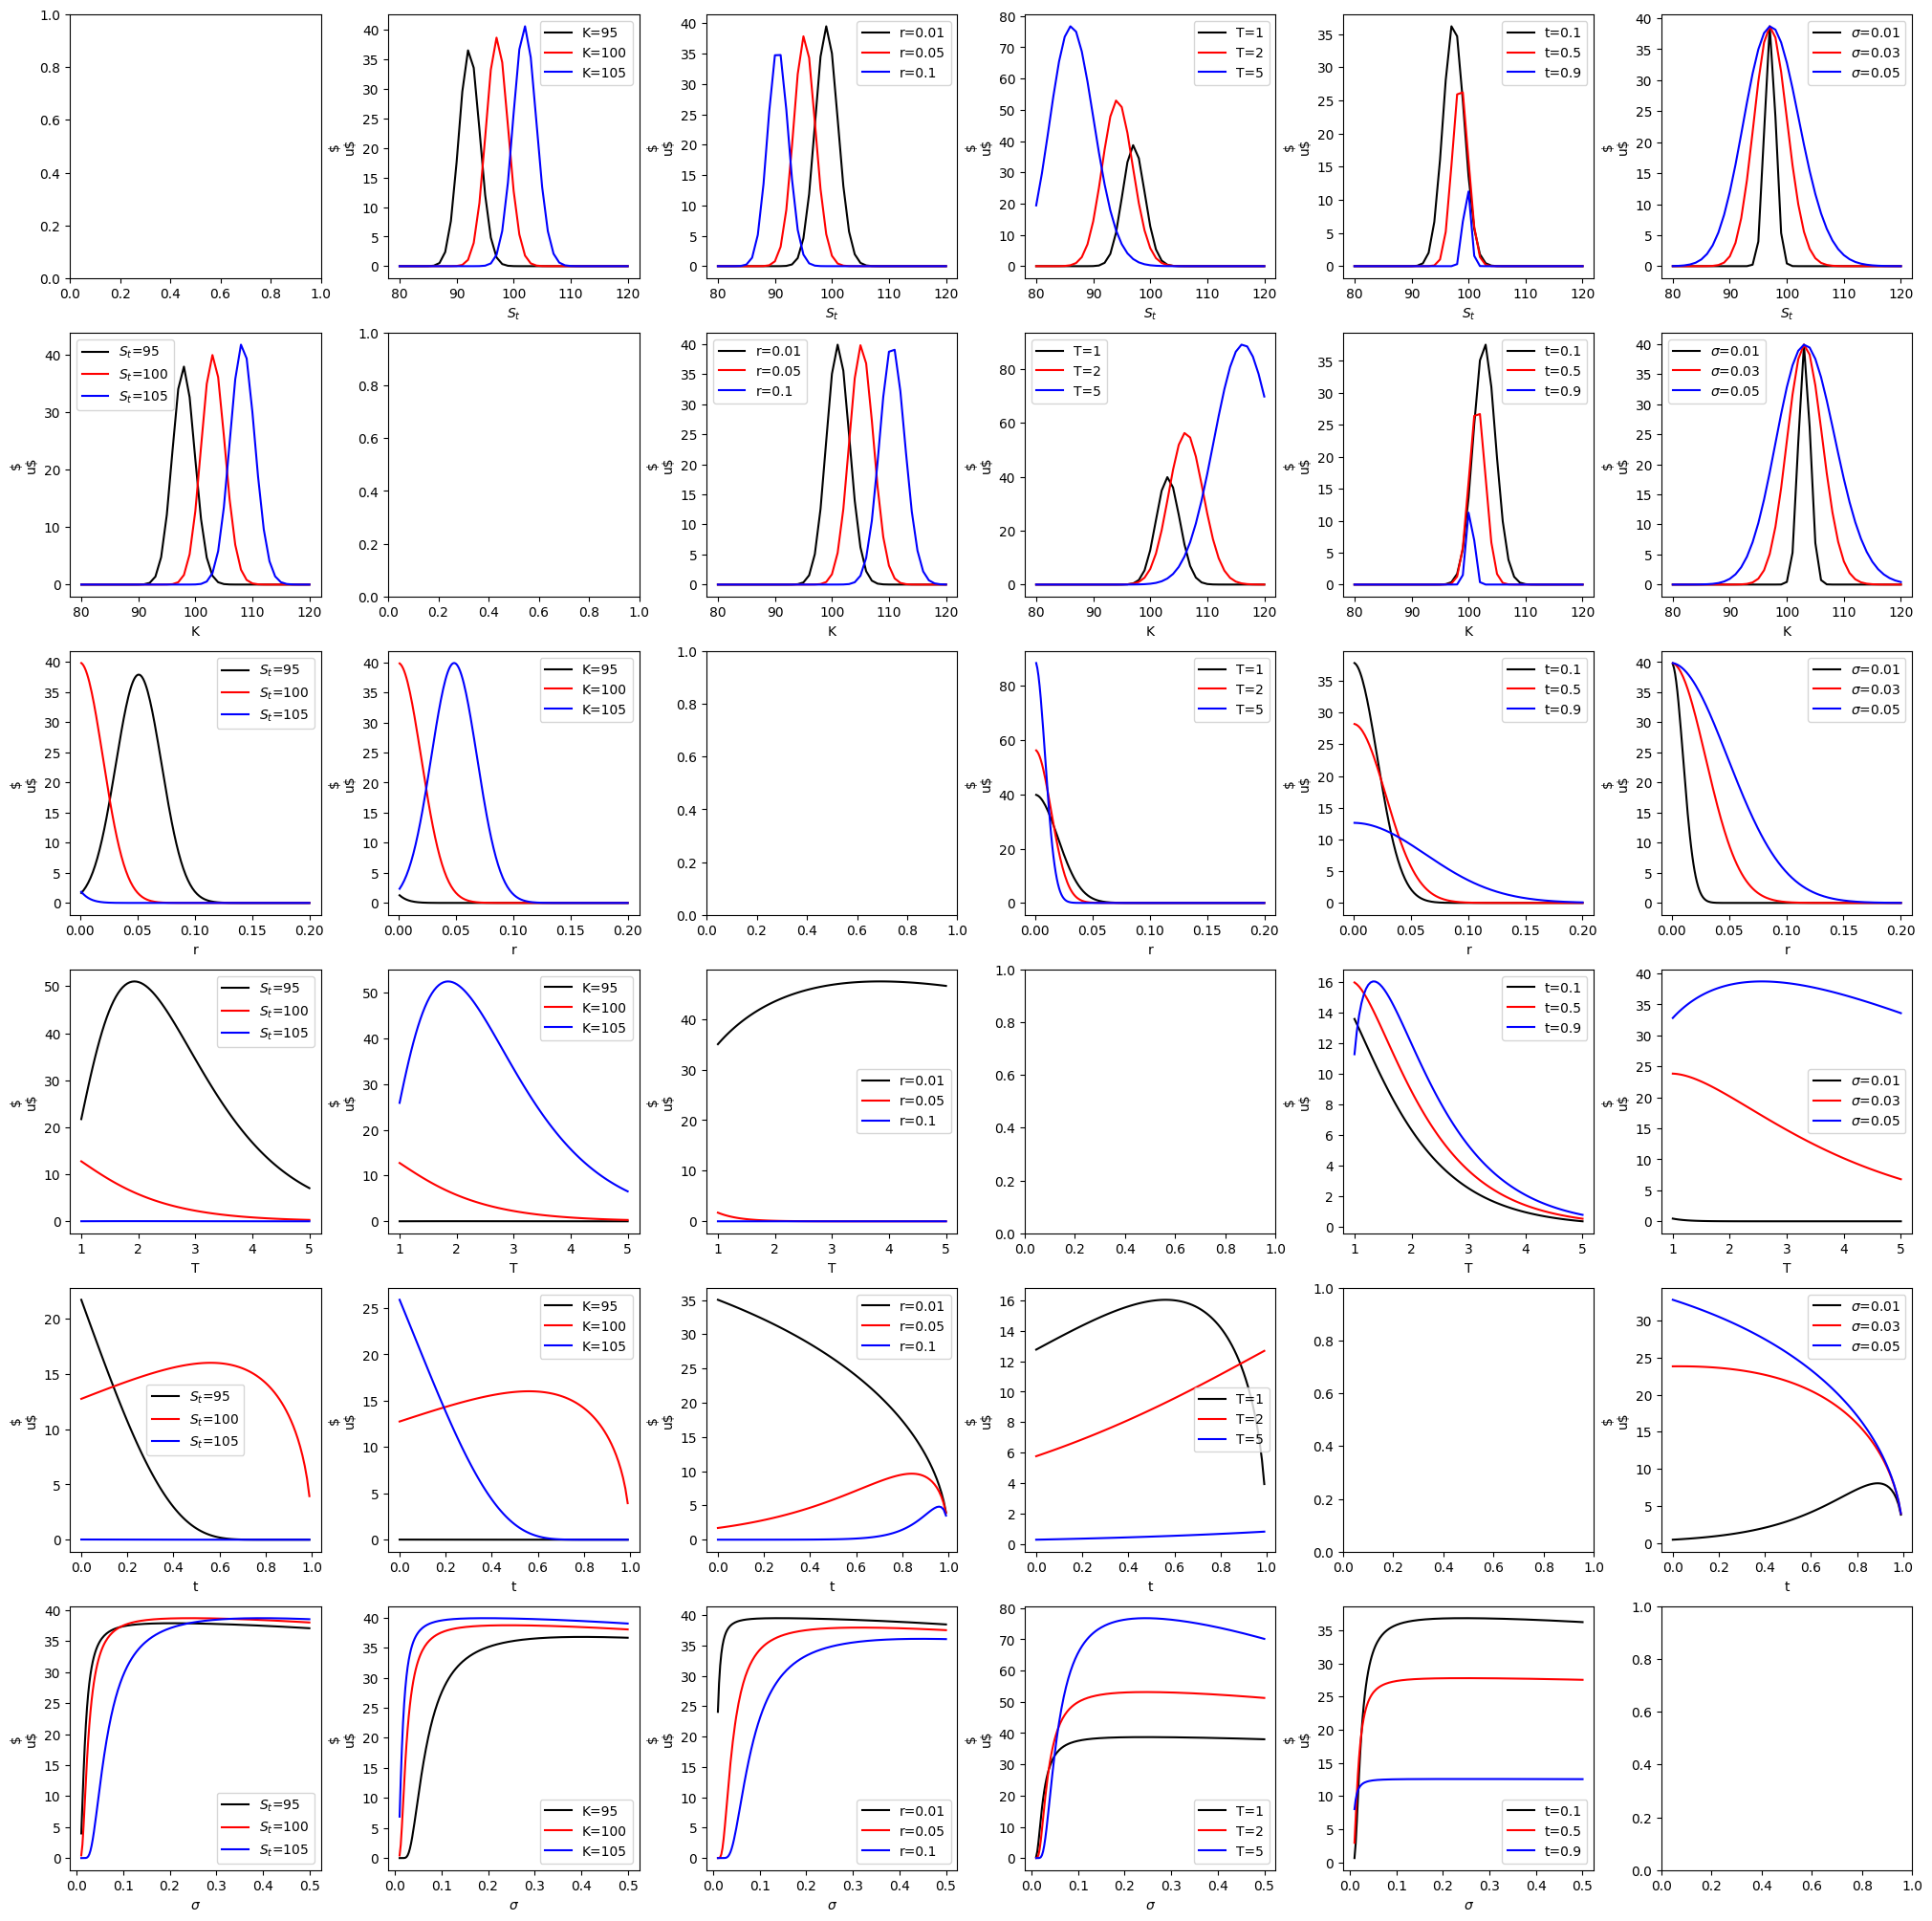

In [27]:
# Vega
fig, ax = plt.subplots(6,6,figsize=(20,20))
fig.tight_layout(h_pad=2, w_pad=2)
greek = Greek()

def autoplot(ax,row,seqKey,dataDic:dataD):
    # set up parameters
    StL = [95,100,105]
    KL = [95,100,105]
    rL = [0.01,0.05,0.1]
    TL = [1,2,5]
    tL = [0.1,0.5,0.9]
    sigL = [0.01,0.03,0.05]

    colorL = ["black","red","blue"]
    xlabelL = {"St":"$S_t$","K":"K","r":"r","T":"T","t":"t","sig":"$\sigma$"}
    
    # loop levels
    for col in range(6):
        if col == row:
            continue
        if col == 0:
            for dataInd in range(3):
                dataDic.update("St",StL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.vega(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\nu$")
            ax[row,col].legend([f"$S_t$={StL[0]}",f"$S_t$={StL[1]}",f"$S_t$={StL[2]}"])
            dataDic.initKey("St")
        elif col == 1:
            for dataInd in range(3):
                dataDic.update("K", KL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.vega(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\nu$")
            ax[row,col].legend([f"K={KL[0]}",f"K={KL[1]}",f"K={KL[2]}"])
            dataDic.initKey("K")
        elif col == 2:
            for dataInd in range(3):
                dataDic.update("r", rL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.vega(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\nu$")
            ax[row,col].legend([f"r={rL[0]}",f"r={rL[1]}",f"r={rL[2]}"])
            dataDic.initKey("r")
        elif col == 3:
            for dataInd in range(3):
                dataDic.update("T", TL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.vega(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\nu$")
            ax[row,col].legend([f"T={TL[0]}",f"T={TL[1]}",f"T={TL[2]}"])
            dataDic.initKey("T")
        elif col == 4:
            for dataInd in range(3):
                dataDic.update("t", tL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.vega(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\nu$")
            ax[row,col].legend([f"t={tL[0]}",f"t={tL[1]}",f"t={tL[2]}"])
            dataDic.initKey("t")
        elif col == 5:
            for dataInd in range(3):
                dataDic.update("sig", sigL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.vega(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\nu$")
            ax[row,col].legend([f"$\sigma$={sigL[0]}",f"$\sigma$={sigL[1]}",f"$\sigma$={sigL[2]}"])
            dataDic.initKey("sig")
    
    dataDic.init()

# generate plots
data = dataD()
data.update("St",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,0,"St",data)
data.update("K",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,1,"K",data)
data.update("r",np.linspace(start=0.001,stop=0.2,num=200))
autoplot(ax,2,"r",data)
data.update("T",np.linspace(start=1,stop=5,num=100))
autoplot(ax,3,"T",data)
data.update("t",np.linspace(start=0,stop=0.99,num=100))
autoplot(ax,4,"t",data)
data.update("sig",np.linspace(start=0.01,stop=0.5,num=200))
autoplot(ax,5,"sig",data)

In [28]:
plt.close()

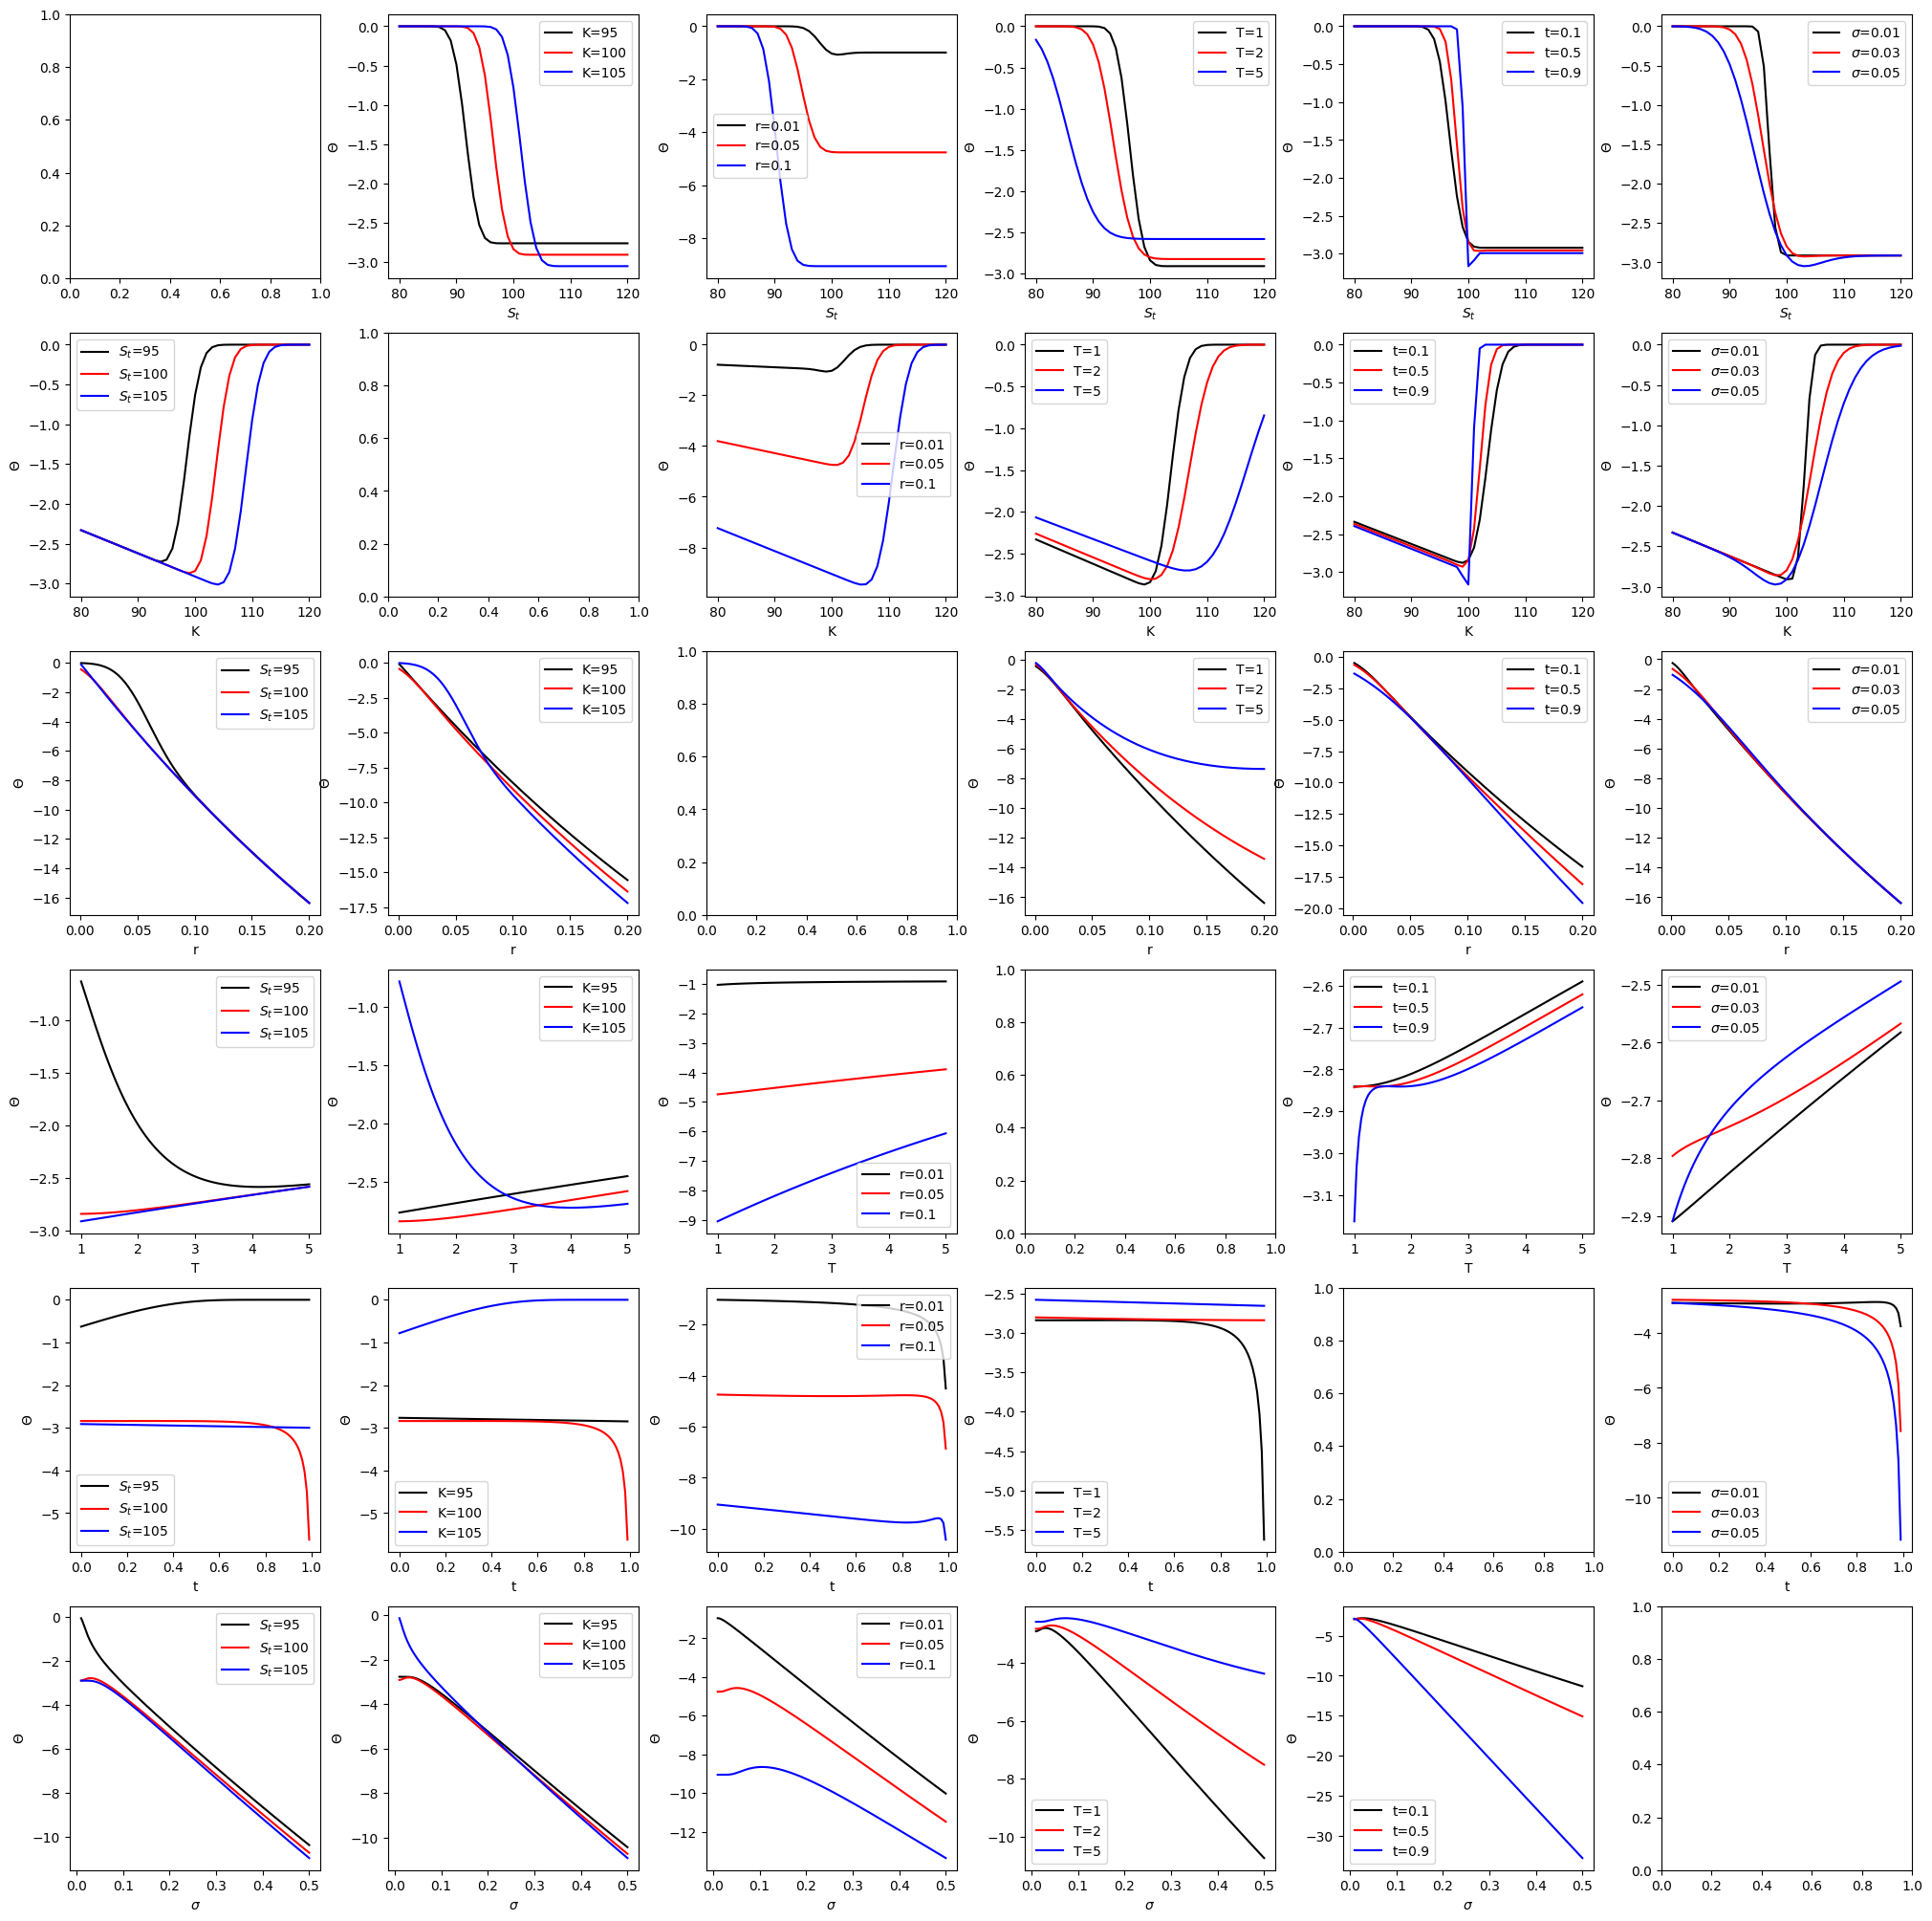

In [30]:
# Theta
fig, ax = plt.subplots(6,6,figsize=(20,20))
fig.tight_layout(h_pad=2, w_pad=2)
greek = Greek()

def autoplot(ax,row,seqKey,dataDic:dataD):
    # set up parameters
    StL = [95,100,105]
    KL = [95,100,105]
    rL = [0.01,0.05,0.1]
    TL = [1,2,5]
    tL = [0.1,0.5,0.9]
    sigL = [0.01,0.03,0.05]

    colorL = ["black","red","blue"]
    xlabelL = {"St":"$S_t$","K":"K","r":"r","T":"T","t":"t","sig":"$\sigma$"}
    
    # loop levels
    for col in range(6):
        if col == row:
            continue
        if col == 0:
            for dataInd in range(3):
                dataDic.update("St",StL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.theta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Theta$")
            ax[row,col].legend([f"$S_t$={StL[0]}",f"$S_t$={StL[1]}",f"$S_t$={StL[2]}"])
            dataDic.initKey("St")
        elif col == 1:
            for dataInd in range(3):
                dataDic.update("K", KL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.theta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Theta$")
            ax[row,col].legend([f"K={KL[0]}",f"K={KL[1]}",f"K={KL[2]}"])
            dataDic.initKey("K")
        elif col == 2:
            for dataInd in range(3):
                dataDic.update("r", rL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.theta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Theta$")
            ax[row,col].legend([f"r={rL[0]}",f"r={rL[1]}",f"r={rL[2]}"])
            dataDic.initKey("r")
        elif col == 3:
            for dataInd in range(3):
                dataDic.update("T", TL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.theta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Theta$")
            ax[row,col].legend([f"T={TL[0]}",f"T={TL[1]}",f"T={TL[2]}"])
            dataDic.initKey("T")
        elif col == 4:
            for dataInd in range(3):
                dataDic.update("t", tL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.theta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Theta$")
            ax[row,col].legend([f"t={tL[0]}",f"t={tL[1]}",f"t={tL[2]}"])
            dataDic.initKey("t")
        elif col == 5:
            for dataInd in range(3):
                dataDic.update("sig", sigL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.theta(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel="$\Theta$")
            ax[row,col].legend([f"$\sigma$={sigL[0]}",f"$\sigma$={sigL[1]}",f"$\sigma$={sigL[2]}"])
            dataDic.initKey("sig")
    
    dataDic.init()

# generate plots
data = dataD()
data.update("St",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,0,"St",data)
data.update("K",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,1,"K",data)
data.update("r",np.linspace(start=0.001,stop=0.2,num=200))
autoplot(ax,2,"r",data)
data.update("T",np.linspace(start=1,stop=5,num=100))
autoplot(ax,3,"T",data)
data.update("t",np.linspace(start=0,stop=0.99,num=100))
autoplot(ax,4,"t",data)
data.update("sig",np.linspace(start=0.01,stop=0.5,num=200))
autoplot(ax,5,"sig",data)

In [31]:
plt.close()

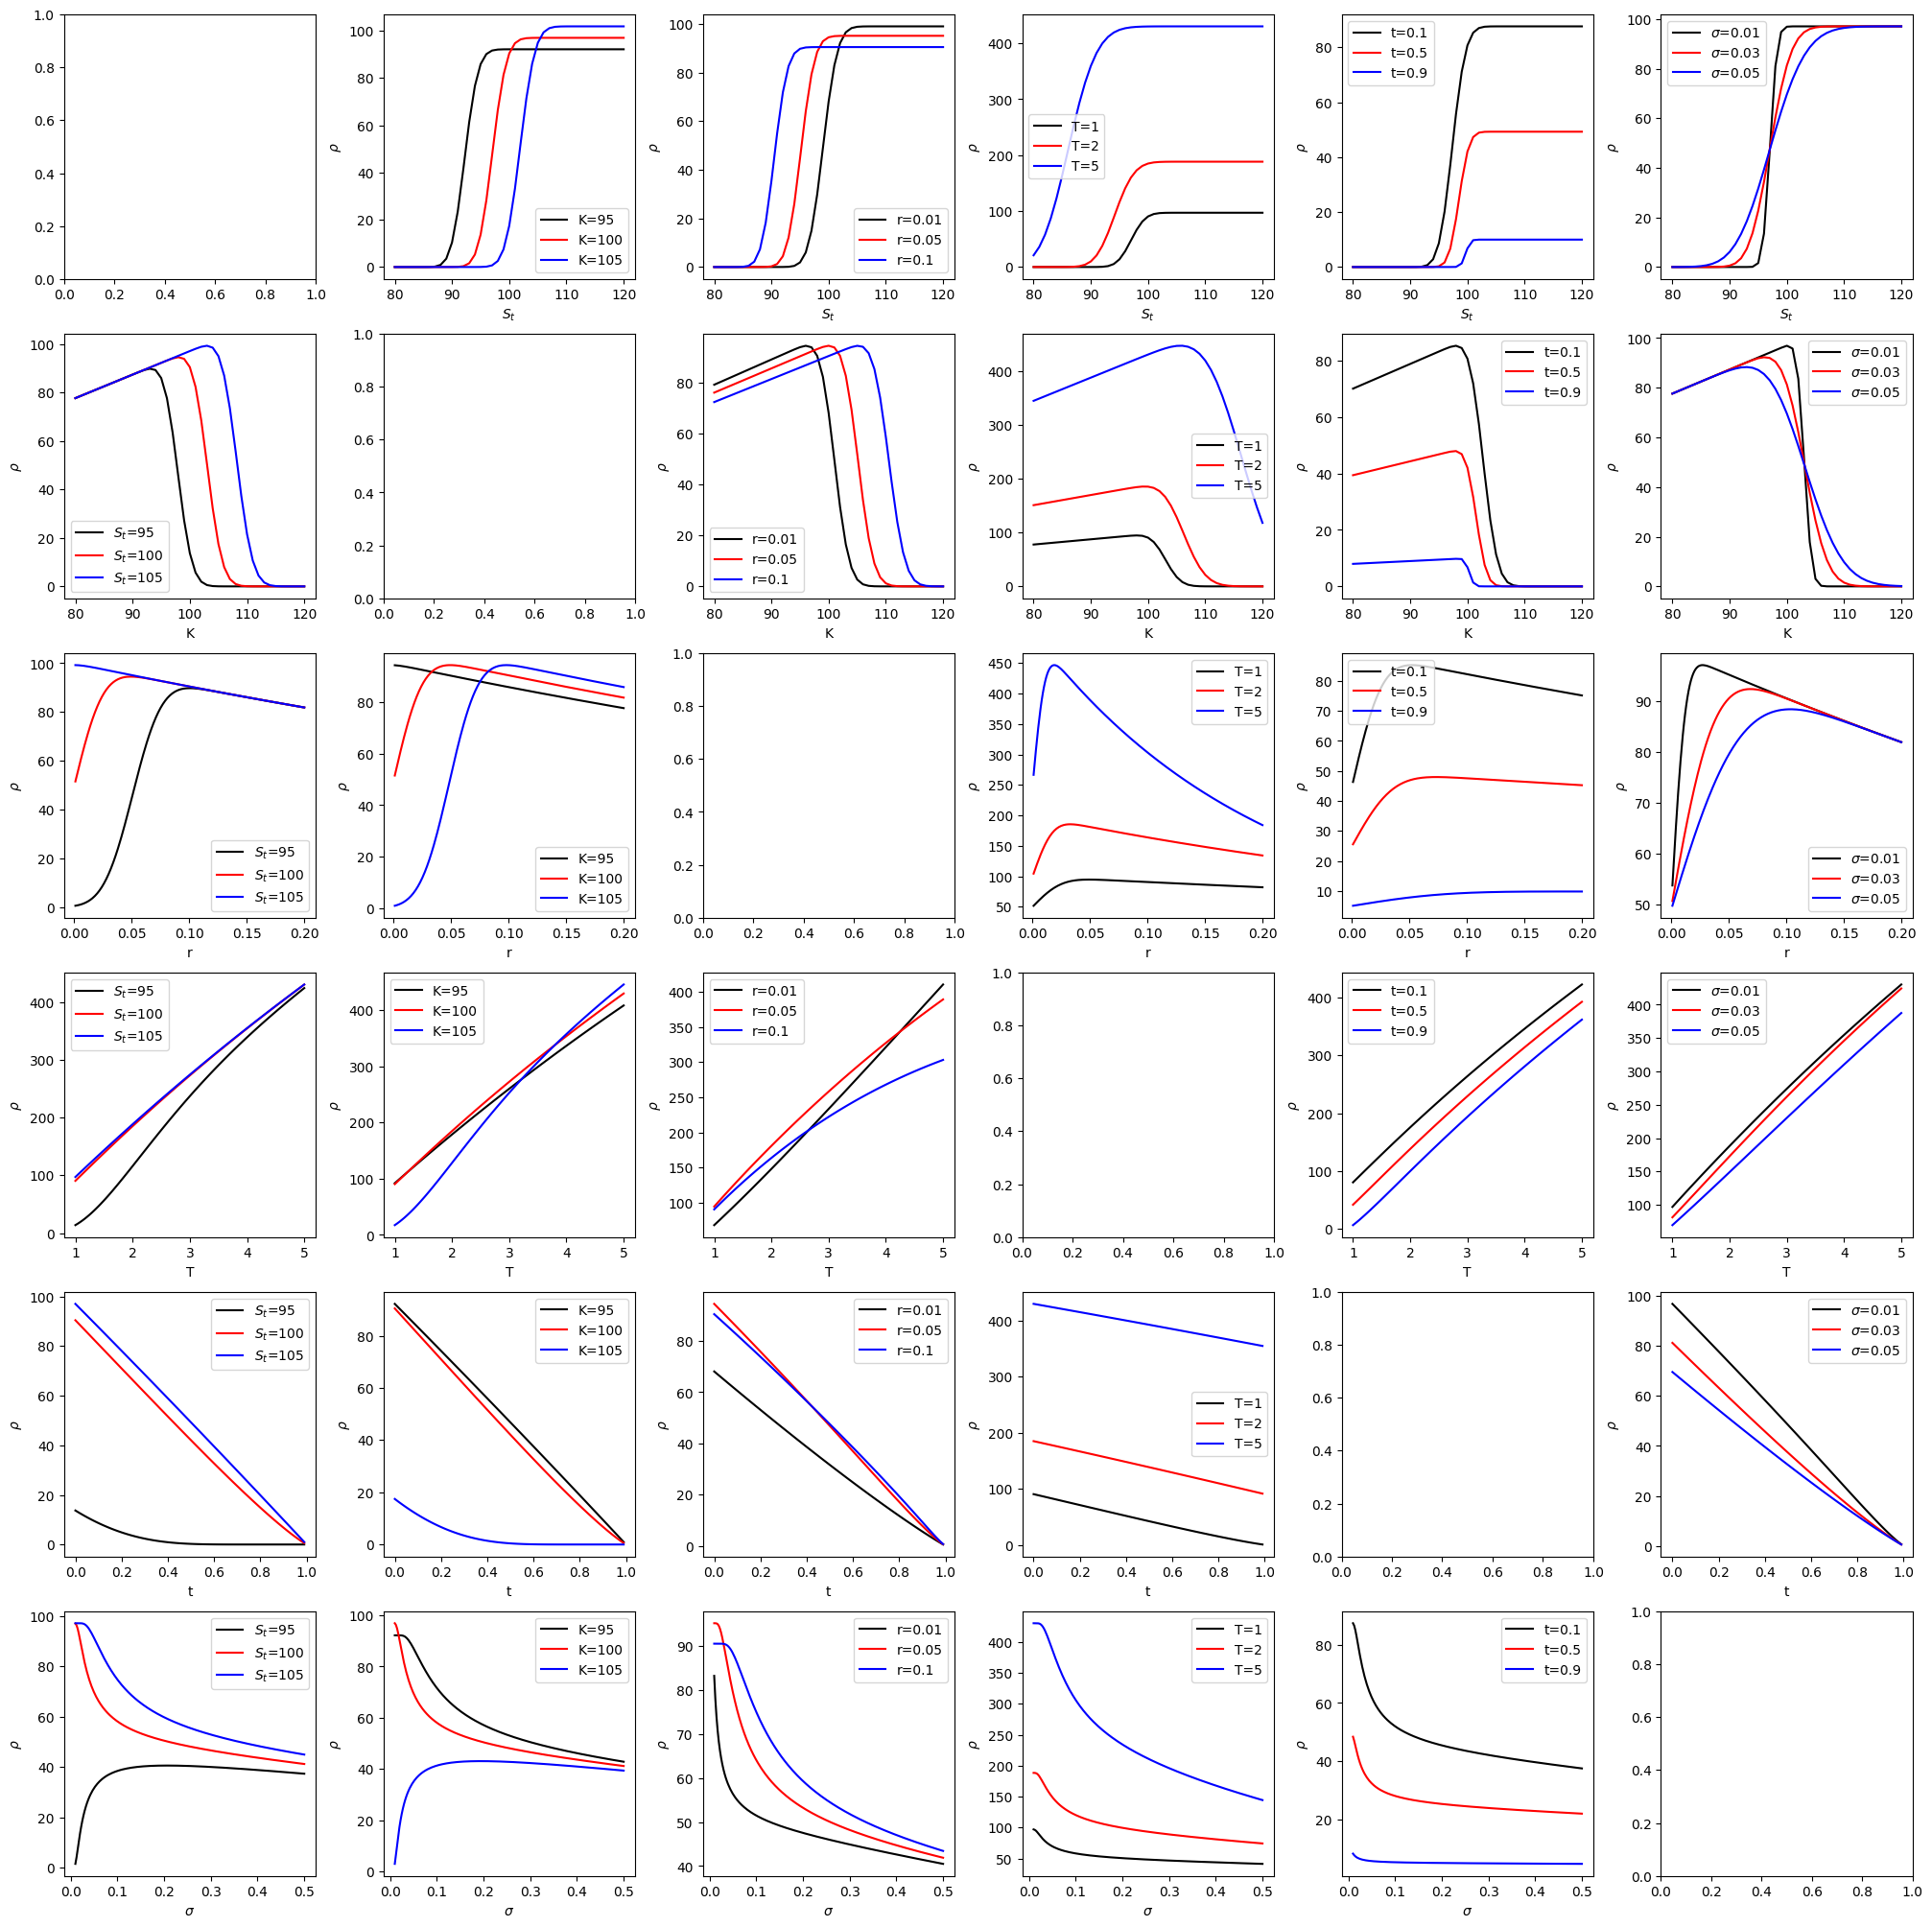

In [33]:
# Rho
fig, ax = plt.subplots(6,6,figsize=(20,20))
fig.tight_layout(h_pad=2, w_pad=2)
greek = Greek()

def autoplot(ax,row,seqKey,dataDic:dataD):
    # set up parameters
    StL = [95,100,105]
    KL = [95,100,105]
    rL = [0.01,0.05,0.1]
    TL = [1,2,5]
    tL = [0.1,0.5,0.9]
    sigL = [0.01,0.03,0.05]

    colorL = ["black","red","blue"]
    xlabelL = {"St":"$S_t$","K":"K","r":"r","T":"T","t":"t","sig":"$\sigma$"}
    
    # loop levels
    for col in range(6):
        if col == row:
            continue
        if col == 0:
            for dataInd in range(3):
                dataDic.update("St",StL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.rho(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel=r"$\rho$")
            ax[row,col].legend([f"$S_t$={StL[0]}",f"$S_t$={StL[1]}",f"$S_t$={StL[2]}"])
            dataDic.initKey("St")
        elif col == 1:
            for dataInd in range(3):
                dataDic.update("K", KL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.rho(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel=r"$\rho$")
            ax[row,col].legend([f"K={KL[0]}",f"K={KL[1]}",f"K={KL[2]}"])
            dataDic.initKey("K")
        elif col == 2:
            for dataInd in range(3):
                dataDic.update("r", rL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.rho(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel=r"$\rho$")
            ax[row,col].legend([f"r={rL[0]}",f"r={rL[1]}",f"r={rL[2]}"])
            dataDic.initKey("r")
        elif col == 3:
            for dataInd in range(3):
                dataDic.update("T", TL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.rho(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel=r"$\rho$")
            ax[row,col].legend([f"T={TL[0]}",f"T={TL[1]}",f"T={TL[2]}"])
            dataDic.initKey("T")
        elif col == 4:
            for dataInd in range(3):
                dataDic.update("t", tL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.rho(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel=r"$\rho$")
            ax[row,col].legend([f"t={tL[0]}",f"t={tL[1]}",f"t={tL[2]}"])
            dataDic.initKey("t")
        elif col == 5:
            for dataInd in range(3):
                dataDic.update("sig", sigL[dataInd])
                data = dataDic.D
                # plot
                ax[row,col].plot(data[seqKey],
                                greek.rho(data["St"],data["K"],data["r"],data["T"],data["t"],data["sig"]),c=colorL[dataInd])
            ax[row,col].set(xlabel=xlabelL[seqKey],ylabel=r"$\rho$")
            ax[row,col].legend([f"$\sigma$={sigL[0]}",f"$\sigma$={sigL[1]}",f"$\sigma$={sigL[2]}"])
            dataDic.initKey("sig")
    
    dataDic.init()

# generate plots
data = dataD()
data.update("St",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,0,"St",data)
data.update("K",np.linspace(start=80,stop=120,num=120-80+1))
autoplot(ax,1,"K",data)
data.update("r",np.linspace(start=0.001,stop=0.2,num=200))
autoplot(ax,2,"r",data)
data.update("T",np.linspace(start=1,stop=5,num=100))
autoplot(ax,3,"T",data)
data.update("t",np.linspace(start=0,stop=0.99,num=100))
autoplot(ax,4,"t",data)
data.update("sig",np.linspace(start=0.01,stop=0.5,num=200))
autoplot(ax,5,"sig",data)